In [1]:
import tensorflow_datasets as tfds

# 데이터셋 다운로드 및 로드
dataset, info = tfds.load(
    'tf_flowers', 
    with_info=True,  # 데이터셋 정보도 함께 로드
    as_supervised=True,  # (이미지, 레이블) 튜플로 반환
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]']
)

# 데이터셋 분할
train_ds, val_ds, test_ds = dataset


In [2]:
import tensorflow as tf

IMG_SIZE = 160  # 이미지 크기
BATCH_SIZE = 32  # 배치 크기

def format_example(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # 이미지 정규화
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  # 이미지 리사이즈
    return image, label

# 데이터셋을 변형하고 배치 처리합니다.
train_batches = train_ds.map(format_example).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_batches = val_ds.map(format_example).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_batches = test_ds.map(format_example).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# VGG16 모델 불러오기 (pre-trained weights는 사용하지 않음)
base_model = VGG16(weights=None, include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Global Average Pooling과 Dense Layer 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(5, activation='softmax')(x)  # 클래스 수를 5로 설정

# 모델 정의
model = Model(inputs=base_model.input, outputs=x)


In [4]:
from tensorflow.keras.optimizers import Adam

# 옵티마이저 및 학습률 설정
base_learning_rate = 0.0001
optimizer = Adam(learning_rate=base_learning_rate)

# 모델 컴파일
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [5]:
EPOCHS = 10
history = model.fit(
    train_batches,
    epochs=EPOCHS,
    validation_data=val_batches,
    verbose=1
)


Epoch 1/10
92/92 [==============================] - 38s 307ms/step - loss: 1.5252 - accuracy: 0.2742 - val_loss: 1.4748 - val_accuracy: 0.2725
Epoch 2/10
92/92 [==============================] - 20s 223ms/step - loss: 1.3621 - accuracy: 0.3467 - val_loss: 1.3083 - val_accuracy: 0.3842
Epoch 3/10
92/92 [==============================] - 20s 220ms/step - loss: 1.1780 - accuracy: 0.4867 - val_loss: 1.0955 - val_accuracy: 0.5559
Epoch 4/10
92/92 [==============================] - 20s 220ms/step - loss: 1.0516 - accuracy: 0.5538 - val_loss: 0.9987 - val_accuracy: 0.6049
Epoch 5/10
92/92 [==============================] - 20s 221ms/step - loss: 0.9887 - accuracy: 0.6018 - val_loss: 1.0045 - val_accuracy: 0.5886
Epoch 6/10
92/92 [==============================] - 20s 221ms/step - loss: 0.9219 - accuracy: 0.6318 - val_loss: 0.8439 - val_accuracy: 0.6676
Epoch 7/10
92/92 [==============================] - 20s 221ms/step - loss: 0.8736 - accuracy: 0.6628 - val_loss: 0.8434 - val_accuracy: 0.6866

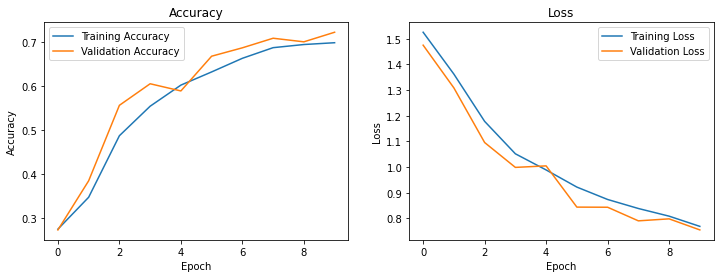

12/12 [==============================] - 1s 63ms/step - loss: 0.7091 - accuracy: 0.7084
Test Loss: 0.7091
Test Accuracy: 0.7084


In [6]:
import matplotlib.pyplot as plt

# 학습 과정 시각화
plt.figure(figsize=(12, 4))

# Accuracy 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 테스트 데이터 성능 평가
test_loss, test_accuracy = model.evaluate(test_batches)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np

# 예측할 이미지 파일 경로 (파일 경로를 실제 이미지 경로로 수정하세요)
img_path = '해바라기.jpeg'  # 실제 이미지 파일 경로로 변경

# 이미지 로드 및 전처리
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # 정규화

# 예측
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

print(f"Predicted Class: {predicted_class}")

Predicted Class: [3]


In [8]:
import os

file_path = '/home/aiffel/quest_repo/pexels-pixabay-104827.jpg'
print("File exists:", os.path.isfile(file_path))

File exists: False


In [9]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /aiffel/aiffel/quest_repo


In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 데이터셋 다운로드 및 로드
dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True, split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'])
train_data, val_data, test_data = dataset

# 이미지 사이즈와 배치 크기 설정
IMG_SIZE = 160
BATCH_SIZE = 32

# 데이터 전처리 함수 정의
def preprocess(image, label):
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = image / 255.0  # 정규화
    return image, label

# 데이터셋 준비
train_data = train_data.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE).repeat()
val_data = val_data.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE).repeat()
test_data = test_data.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# 데이터 제너레이터 변수 정의
train_data_gen = train_data
val_data_gen = val_data
test_data_gen = test_data

# steps_per_epoch 및 validation_steps 계산
steps_per_epoch = info.splits['train[:80%]'].num_examples // BATCH_SIZE
validation_steps = info.splits['train[80%:90%]'].num_examples // BATCH_SIZE

# VGG16 모델을 사전 훈련된 모델로 사용
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# 모델의 출력에서 새로운 레이어 추가
x = base_model.output
x = Flatten()(x)  # Flatten 레이어 추가
x = Dense(512, activation='relu')(x)  # Dense 레이어 추가
x = Dropout(0.5)(x)  # Dropout 레이어 추가
predictions = Dense(5, activation='softmax')(x)  # 5개의 클래스를 위한 Dense 레이어 추가

# 최종 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 모델 컴파일
base_learning_rate = 0.0001
optimizer = Adam(learning_rate=base_learning_rate)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',  # 혹은 'categorical_crossentropy'
    metrics=['accuracy']
)

# 모델 학습
EPOCHS = 10

history = model.fit(
    train_data_gen,               # 훈련 데이터 제너레이터
    steps_per_epoch=steps_per_epoch,  # 한 에폭당 스텝 수
    epochs=EPOCHS,                # 총 에폭 수
    validation_data=val_data_gen, # 검증 데이터 제너레이터
    validation_steps=validation_steps,  # 검증 데이터에서 스텝 수
    verbose=1                     # 학습 진행 상황을 출력합니다.
)

Epoch 1/10
91/91 [==============================] - 22s 228ms/step - loss: 0.8945 - accuracy: 0.6411 - val_loss: 0.5793 - val_accuracy: 0.7926
Epoch 2/10
91/91 [==============================] - 21s 228ms/step - loss: 0.4397 - accuracy: 0.8295 - val_loss: 0.3719 - val_accuracy: 0.8693
Epoch 3/10
91/91 [==============================] - 21s 227ms/step - loss: 0.3247 - accuracy: 0.8791 - val_loss: 0.4223 - val_accuracy: 0.8239
Epoch 4/10
91/91 [==============================] - 21s 228ms/step - loss: 0.2538 - accuracy: 0.9094 - val_loss: 0.3446 - val_accuracy: 0.8778
Epoch 5/10
91/91 [==============================] - 21s 227ms/step - loss: 0.2282 - accuracy: 0.9198 - val_loss: 0.3987 - val_accuracy: 0.8494
Epoch 6/10
91/91 [==============================] - 21s 227ms/step - loss: 0.1964 - accuracy: 0.9270 - val_loss: 0.3523 - val_accuracy: 0.8778
Epoch 7/10
91/91 [==============================] - 21s 227ms/step - loss: 0.2393 - accuracy: 0.9167 - val_loss: 0.3178 - val_accuracy: 0.8977

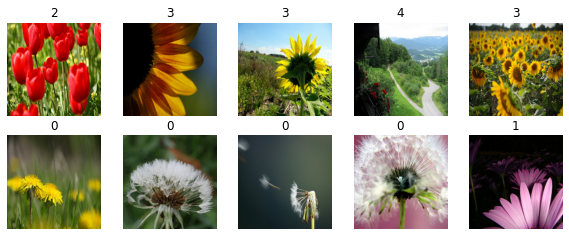

In [11]:
import matplotlib.pyplot as plt

# 첫 번째 배치를 가져옵니다.
image_batch, label_batch = next(iter(train_data_gen))

# 10개의 이미지를 표시합니다.
plt.figure(figsize=(10, 10))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(image_batch[i])
    plt.title(int(label_batch[i]))
    plt.axis("off")
plt.show()


- 데이터 링크에서 확인한 바, 튤립:2 / 해바라기:3 / 장미:4 / 단델리온:0 / 데이지:1 로 확인됨
- 처음에 이미지 파일의 경로를 썼는데 잘못 입력했음을 확인하고 다시 돌려보니 잘 돌아감
- 0.9725로 성능 올리기 성공
- 모델 구조를 강화하고 규제 기법을 추가하는 등의 방법으로 성능 향상
- CV 재밌어용